In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
     
df = pd.read_csv("SimpleSUSTDengue Fever.csv")
df.head(10)

,sub_id,sex,age,wgt,Height (in meter ),Body Mass Index (BMI),fever,platelet,hemato,wbc,...,s_rash,headache,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,NaN,NaN,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,NaN,NaN,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,NaN,NaN,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,NaN,NaN,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,NaN,NaN,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0
5,DEN_0006,M,21,11,NaN,NaN,1,30000,24,4000,...,0,1,0,1,0,1,0,0,0,1
6,DEN_0007,F,18,12,NaN,NaN,0,60000,35,8000,...,0,1,0,0,0,0,0,0,1,0
7,DEN_0008,M,30,13,NaN,NaN,1,20000,30,3500,...,0,0,0,1,1,0,1,0,1,1
8,DEN_0009,M,15,11,NaN,NaN,1,30000,25,3000,...,0,1,1,1,0,1,0,0,1,1
9,DEN_0010,F,48,14,NaN,NaN,0,50000,35,7000,...,0,1,0,0,0,0,0,0,0,0


In [2]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(df.columns)

Index(['sub_id', 'sex', 'age', 'wgt', 'height_(in_meter_)',
       'body_mass_index_(bmi)', 'fever', 'platelet', 'hemato', 'wbc', 'j_pain',
       's_rash', 'headache_', 'abdo_pain', 'vomit', 'bleed', 'ns1_anti',
       'igm_anti', 'igg_anti', 'hospi', 'target'],
      dtype='object')


In [3]:
# Define a function to calculate height based on weight
def calculate_height(weight):
    height = weight * 10.0  #  Assume height is 10 times the weight
    return height

df['height_(in_meter_)'] = df['wgt'].apply(calculate_height)

In [4]:
# Define a function to calculate BMI
def calculate_bmi(row):
    weight_kg = row['wgt']  # Replace with your weight column name
    height_m = row['height_(in_meter_)']  # Replace with your height column name
    
    # Calculate BMI
    bmi = weight_kg / (height_m ** 2)
    return bmi

# Apply the calculate_bmi function to create a new 'body_mass_index_(bmi)' column
df['body_mass_index_(bmi)'] = df.apply(calculate_bmi, axis=1)

In [5]:
df.head(10)

,sub_id,sex,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,...,s_rash,headache_,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target
0,DEN_0001,M,36,14,140.0,0.000714,1,20000,40,6000,...,0,1,1,1,0,0,1,1,1,1
1,DEN_0002,M,48,15,150.0,0.000667,1,18000,38,5500,...,0,0,0,1,0,1,0,0,1,1
2,DEN_0003,F,24,12,120.0,0.000833,1,13000,45,6300,...,0,1,0,1,0,1,0,0,1,1
3,DEN_0004,M,13,8,80.0,0.001250,1,35000,29,7025,...,0,1,0,0,1,1,0,0,1,1
4,DEN_0005,F,19,10,100.0,0.001000,1,50000,35,2622,...,0,0,1,1,0,0,0,0,1,0
5,DEN_0006,M,21,11,110.0,0.000909,1,30000,24,4000,...,0,1,0,1,0,1,0,0,0,1
6,DEN_0007,F,18,12,120.0,0.000833,0,60000,35,8000,...,0,1,0,0,0,0,0,0,1,0
7,DEN_0008,M,30,13,130.0,0.000769,1,20000,30,3500,...,0,0,0,1,1,0,1,0,1,1
8,DEN_0009,M,15,11,110.0,0.000909,1,30000,25,3000,...,0,1,1,1,0,1,0,0,1,1
9,DEN_0010,F,48,14,140.0,0.000714,0,50000,35,7000,...,0,1,0,0,0,0,0,0,0,0


In [6]:
df.isnull().sum()

sub_id                   0
sex                      0
age                      0
wgt                      0
height_(in_meter_)       0
body_mass_index_(bmi)    0
fever                    0
platelet                 0
hemato                   0
wbc                      0
j_pain                   0
s_rash                   0
headache_                0
abdo_pain                0
vomit                    0
bleed                    0
ns1_anti                 0
igm_anti                 0
igg_anti                 0
hospi                    0
target                   0
dtype: int64

In [7]:
df_encoded = pd.get_dummies(df, columns=['sex'], prefix=['sex'])

# Convert the boolean columns to numeric (1 and 0)
df_encoded['sex_F'] = df_encoded['sex_F'].astype(int)
df_encoded['sex_M'] = df_encoded['sex_M'].astype(int)

# # Add the 'sex_F' and 'sex_M' columns back to the original dataset
df['sex_F'] = df_encoded['sex_F']
df['sex_M'] = df_encoded['sex_M']

In [8]:
df.head(5)

,sub_id,sex,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,...,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M
0,DEN_0001,M,36,14,140.0,0.000714,1,20000,40,6000,...,1,1,0,0,1,1,1,1,0,1
1,DEN_0002,M,48,15,150.0,0.000667,1,18000,38,5500,...,0,1,0,1,0,0,1,1,0,1
2,DEN_0003,F,24,12,120.0,0.000833,1,13000,45,6300,...,0,1,0,1,0,0,1,1,1,0
3,DEN_0004,M,13,8,80.0,0.001250,1,35000,29,7025,...,0,0,1,1,0,0,1,1,0,1
4,DEN_0005,F,19,10,100.0,0.001000,1,50000,35,2622,...,1,1,0,0,0,0,1,0,1,0


In [9]:
df.drop(columns=['sex','sub_id'], inplace=True)

In [10]:
df.head(5)

,age,wgt,height_(in_meter_),body_mass_index_(bmi),fever,platelet,hemato,wbc,j_pain,s_rash,...,abdo_pain,vomit,bleed,ns1_anti,igm_anti,igg_anti,hospi,target,sex_F,sex_M
0,36,14,140.0,0.000714,1,20000,40,6000,1,0,...,1,1,0,0,1,1,1,1,0,1
1,48,15,150.0,0.000667,1,18000,38,5500,0,0,...,0,1,0,1,0,0,1,1,0,1
2,24,12,120.0,0.000833,1,13000,45,6300,1,0,...,0,1,0,1,0,0,1,1,1,0
3,13,8,80.0,0.001250,1,35000,29,7025,0,0,...,0,0,1,1,0,0,1,1,0,1
4,19,10,100.0,0.001000,1,50000,35,2622,1,0,...,1,1,0,0,0,0,1,0,1,0


In [11]:
# Create a StandardScaler
from sklearn.preprocessing import StandardScaler
continuous_features = ['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'platelet', 'hemato', 'wbc']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [16]:
# Data Splitting:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Define the features (X) and target variable (y)
X = df.drop(columns=['target'])  # Replace 'target' with your target column name
y = df['target']

# Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000], y[:3000], test_size=0.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

model = RandomForestClassifier(n_estimators=300, random_state = 42, n_jobs = -1)

#Fit
model.fit(X_train,  y_train)
y_pred = model.predict(X_test)

#Checking the accuracy
model_accuracy = round(model.score(X_train, y_train)*100,2)
print(round(model_accuracy, 2), '%')


100.0 %


In [71]:
print(df.columns)

Index(['age', 'wgt', 'height_(in_meter_)', 'body_mass_index_(bmi)', 'fever',
       'platelet', 'hemato', 'wbc', 'j_pain', 's_rash', 'headache_',
       'abdo_pain', 'vomit', 'bleed', 'ns1_anti', 'igm_anti', 'igg_anti',
       'hospi', 'target', 'sex_F', 'sex_M'],
      dtype='object')


In [67]:
# Save the trained model to a PKL file
import joblib
model_filename = 'random_forest_dengue_model.pkl'
joblib.dump(model, model_filename)

['random_forest_dengue_model.pkl']

In [79]:
# Load the trained model
model_filename = 'random_forest_dengue_model.pkl'
model = joblib.load(model_filename)  # Load the correct model object

# Prepare patient data as a DataFrame
patient_data = {
    'age': [25], 
    'wgt': [60],  
    'height_(in_meter_)': [1.75],  
    'body_mass_index_(bmi)':[0.688872],
     'fever':[1],
    'platelet':[1000],
    'hemato': [0.5],  
    'wbc':[100],
    'j_pain':[1],
     's_rash':[1],
     'headache_':[0],
     'abdo_pain':[0],
    'vomit':[0],
    'bleed':[1],
    'ns1_anti':[1],
    'igm_anti':[1],
     'igg_anti':[1],
    'hospi':[0],
   'sex_F':[1],
    'sex_M':[0], 
}

patient_df = pd.DataFrame(patient_data)
predictions = model.predict(patient_df)

if predictions[0] == 1:
    print("The patient is predicted to have dengue.")
else:
    print("The patient is predicted not to have dengue.")

The patient is predicted to have dengue.


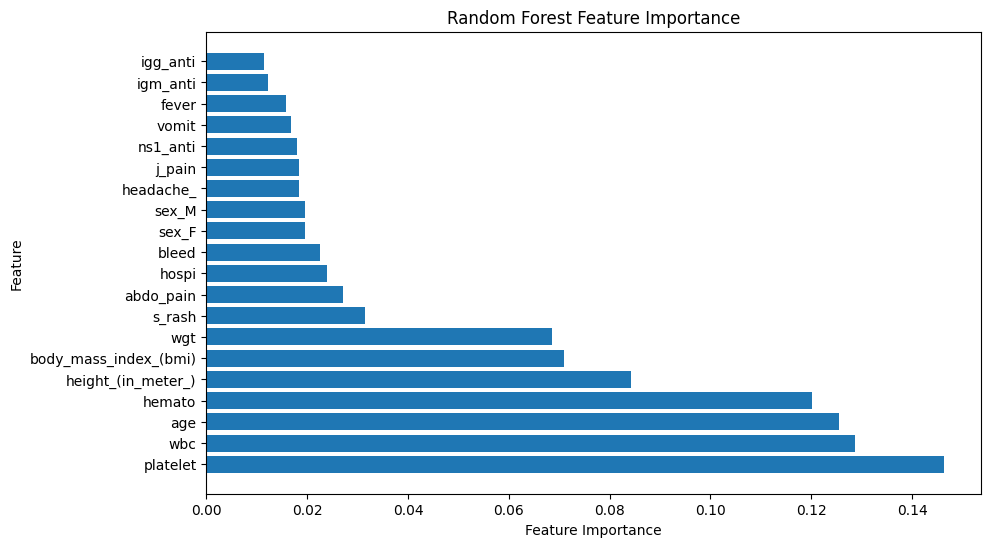

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [19]:
df.to_excel('updated_preprocessed_data.xlsx', index=False)
from IPython.display import FileLink
FileLink('updated_preprocessed_data.xlsx')

C:\Users\Mahbub\updated_preprocessed_data.xlsx

In [23]:
# Save the updated dataset as a CSV file
df.to_csv('preprocessed_data.csv', index=False)
from IPython.display import FileLink
FileLink('preprocessed_data.csv')

C:\Users\Mahbub\preprocessed_data.csv